# House 1 - 63 jours

## Librairie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

## Labels

In [2]:
h1_labels = pd.read_table('house1_labels.txt', header=None)

# Modifions légérement les labels pour les adapter aux titres des graphiques à venir

h1_labels = pd.DataFrame(h1_labels.iloc[:,0].apply(lambda x: x.replace('&','').replace('-',' ')))
h1_labels = pd.DataFrame(h1_labels.iloc[:,0].apply(lambda x: x.split('(')[0].strip()))
h1_labels = pd.DataFrame(h1_labels.iloc[:,0].apply(lambda x: ' '.join(x.split(' ')[:6])))
h1_labels = pd.DataFrame(h1_labels.iloc[:,0].apply(lambda x: ' '.join(x.split())))
h1_labels

,0
0,1 Kitchen Wall Oven L1
1,2 Kitchen Wall Oven L2
2,3 Kitchen Counter Plugs L1
3,4 Kitchen Counter Plugs L2
4,5 Clothes Dryer L1
5,6 Clothes Dryer L2
6,7 Upstairs Bedroom AFCI Arc Fault
7,8 Kitchen Fridge
8,9 Clothes Washer
9,10 Kitchen Dishwasher


## house_energy_blk2 - house 1 - 2016-03-06 to 2016-05-07, 63 days

In [3]:
h1eb2 = pd.read_csv('house1_energy_blk2.csv')

# Nous renommons les colonnes de notre dataframe

l = h1_labels.iloc[:,0].tolist()

for i in range(len(l)):
    n = i + 1
    s = 'sub'+str(n)
    d = {s:l[i]}
    h1eb2.rename(columns=d, inplace=True)
    
# Convertissons la colonne unix_ts en datetime et passons cette colonne en index

h1eb2 = h1eb2.astype({"unix_ts": int})
h1eb2['unix_ts'] = pd.to_datetime(h1eb2['unix_ts'], unit='s')
h1eb2 = h1eb2.set_index('unix_ts', drop=False)

h1eb2.head(3)

,unix_ts,ihd,mains,1 Kitchen Wall Oven L1,2 Kitchen Wall Oven L2,3 Kitchen Counter Plugs L1,4 Kitchen Counter Plugs L2,5 Clothes Dryer L1,6 Clothes Dryer L2,7 Upstairs Bedroom AFCI Arc Fault,...,15 Garage Sub Panel L1,16 Garage Sub Panel L2,17 Upstairs Plugs Lights L1,18 Upstairs Plugs Lights L2,19 Basement Blue Plugs,20 Bathrooms,21 Rental Suite Sub Panel L1,22 Rental Suite Sub Panel L2,23 Misc. Plugs,24 Home Office
unix_ts,,,,,,,,,,,,,,,,,,,,,
2016-03-06 08:00:00,2016-03-06 08:00:00,0.5,0.536,0.0,0.002,0.0,0.002,0.000,0.000,0.006,...,0.000,0.0,0.005,0.004,0.021,0.022,0.044,0.041,0.000,0.081
2016-03-06 09:00:00,2016-03-06 09:00:00,0.6,0.557,0.0,0.001,0.0,0.002,0.001,0.000,0.006,...,0.001,0.0,0.005,0.004,0.020,0.023,0.045,0.046,0.000,0.081
2016-03-06 10:00:00,2016-03-06 10:00:00,0.6,0.595,0.0,0.001,0.0,0.002,0.001,0.001,0.006,...,0.000,0.0,0.005,0.004,0.021,0.042,0.044,0.050,0.001,0.082


## Représentations graphiques PART_I

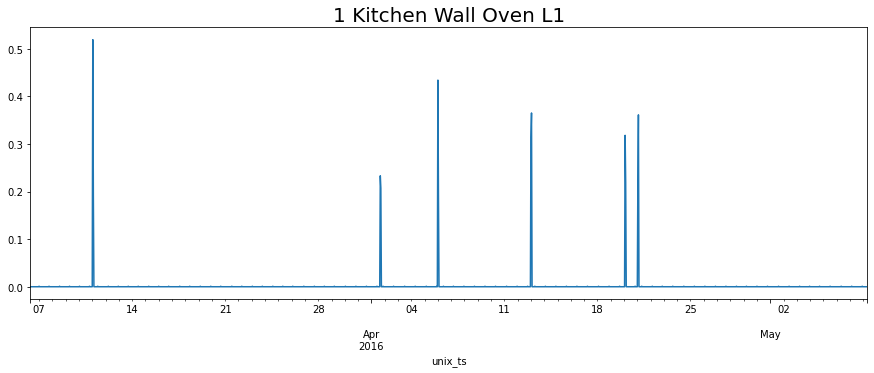

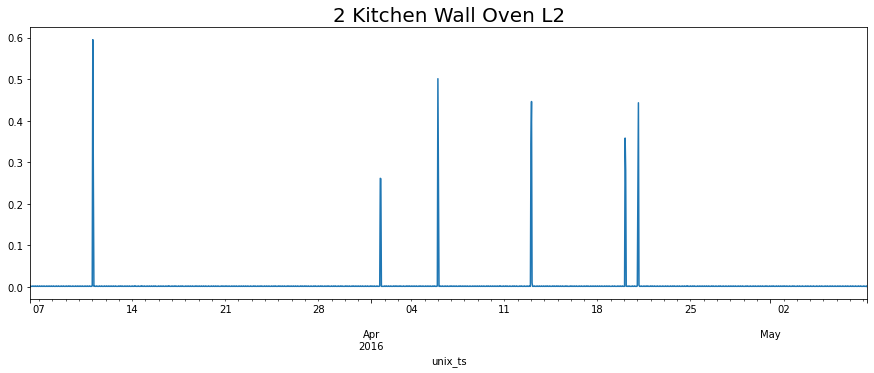

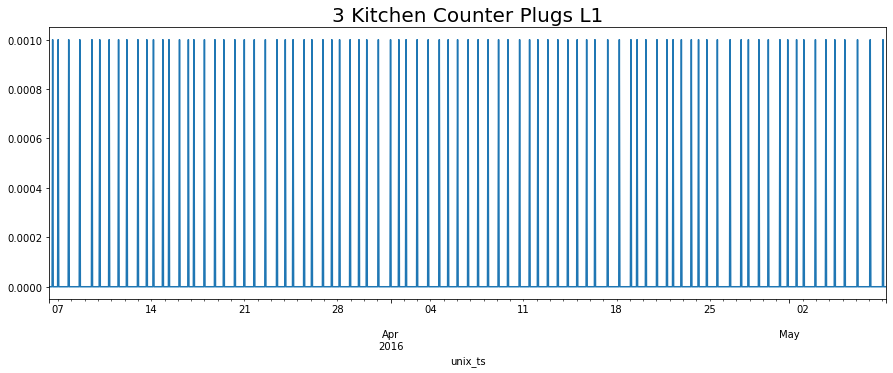

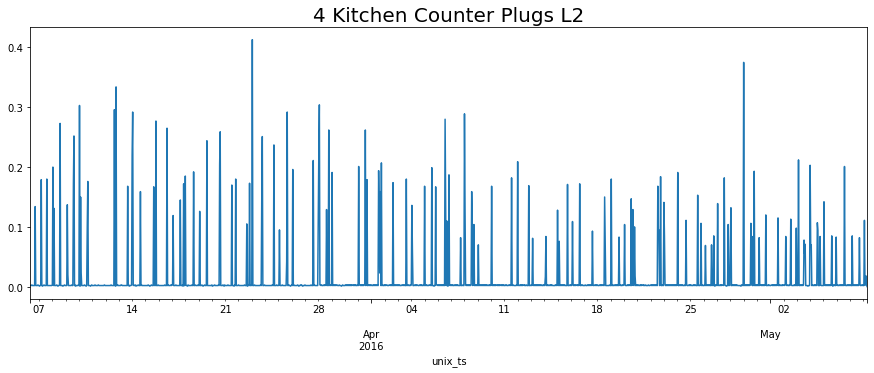

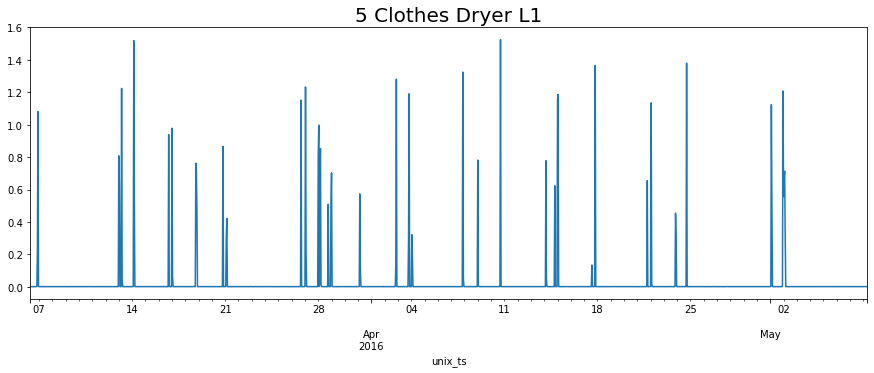

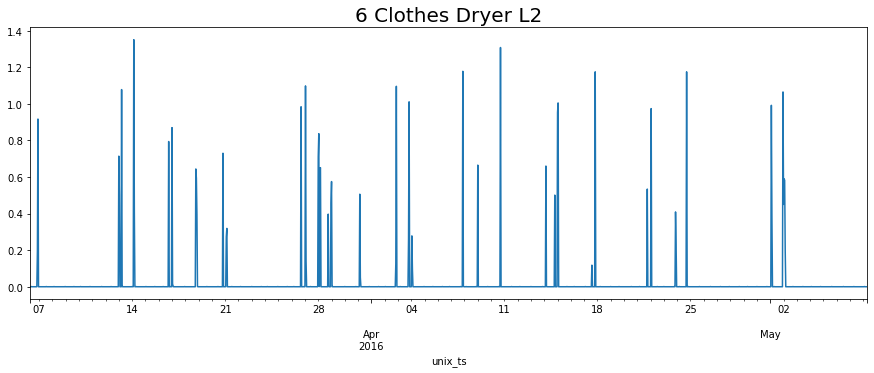

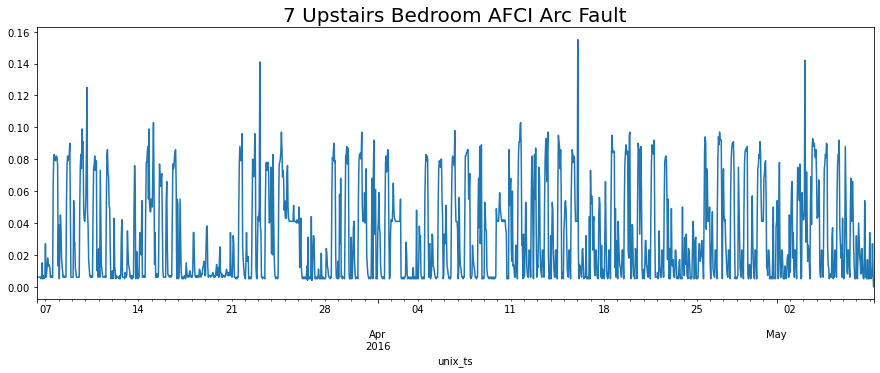

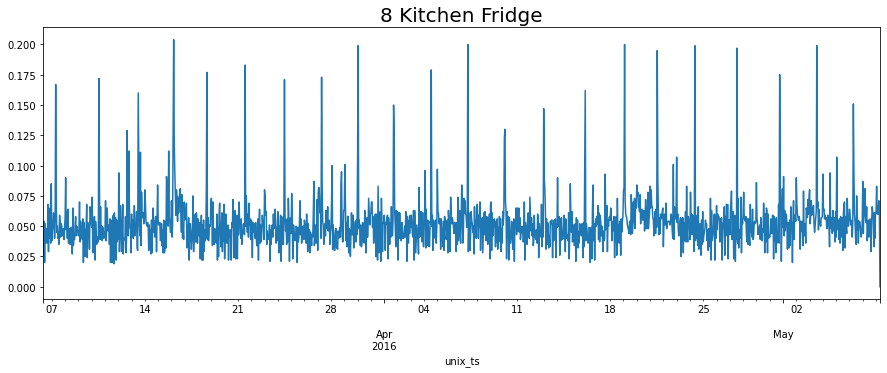

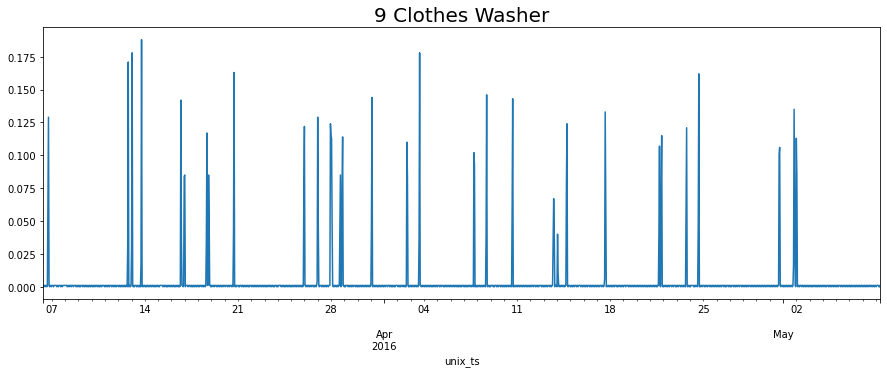

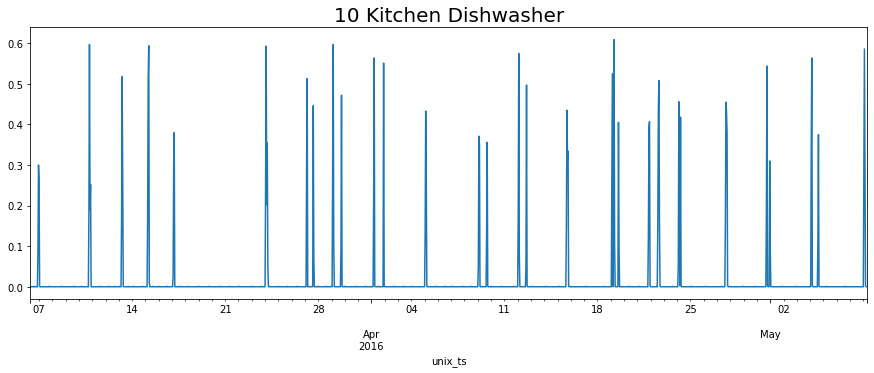

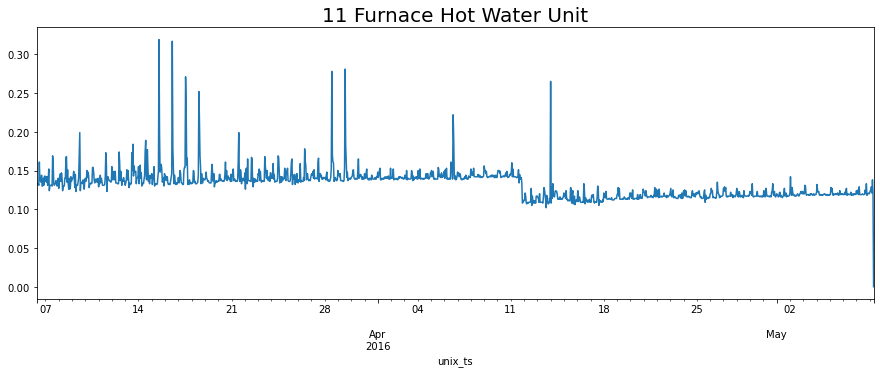

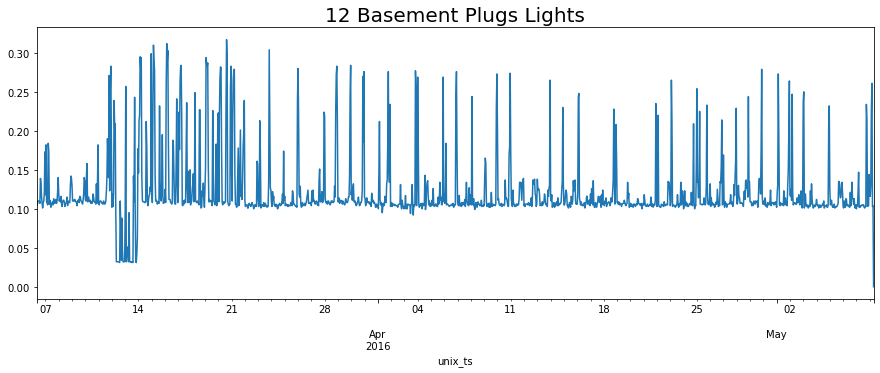

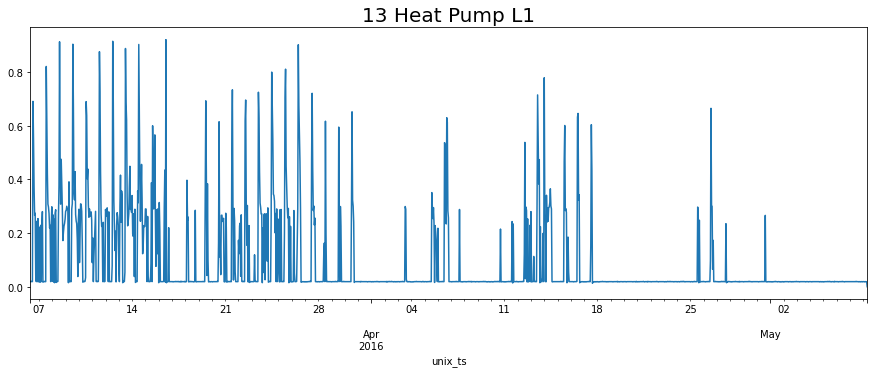

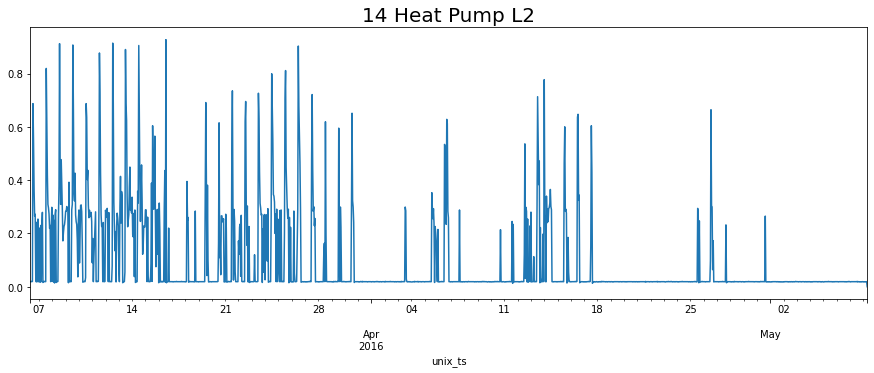

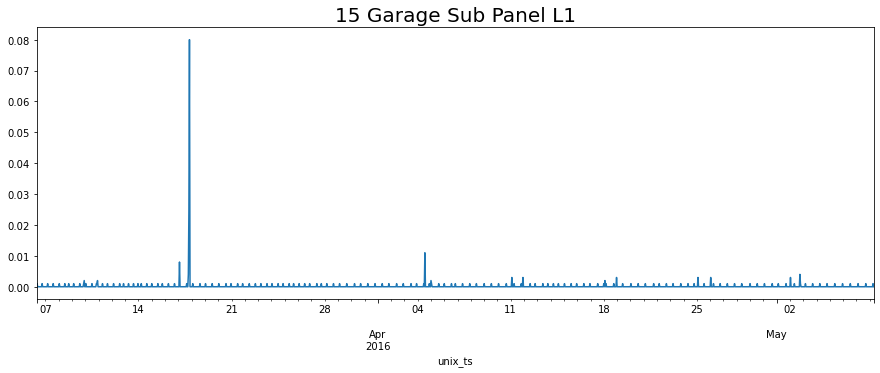

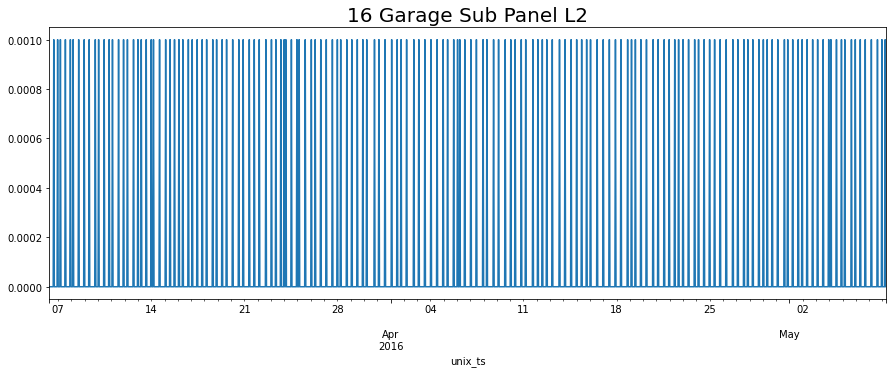

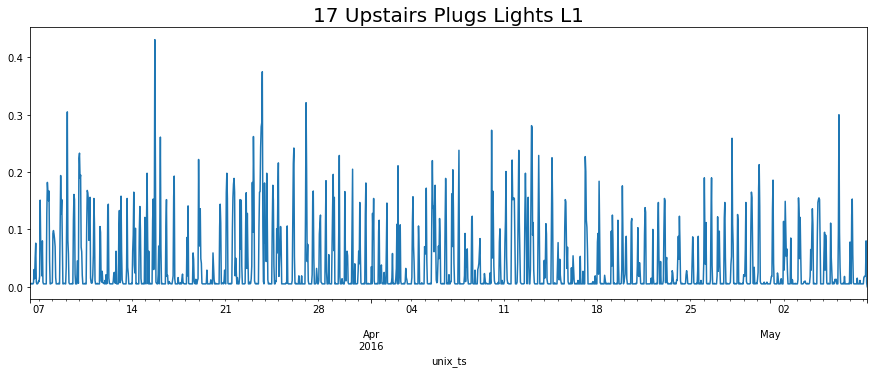

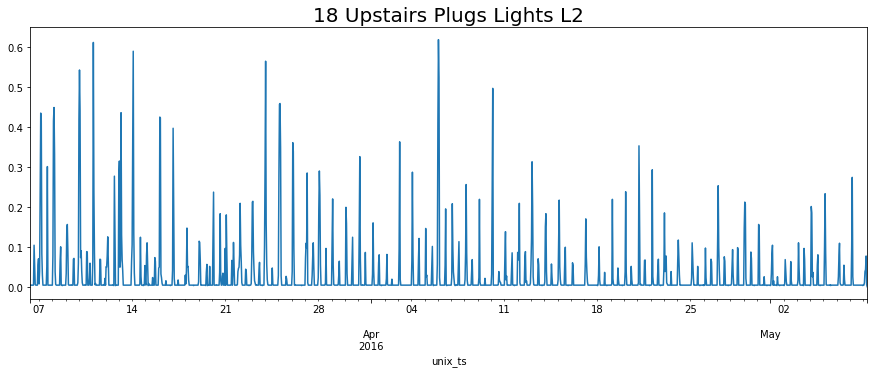

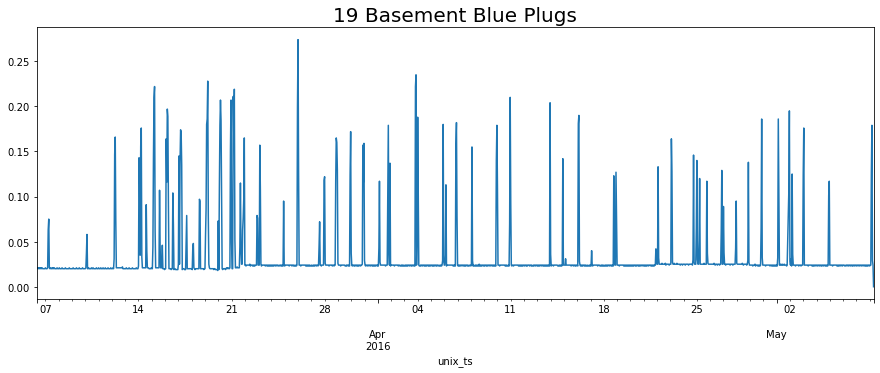

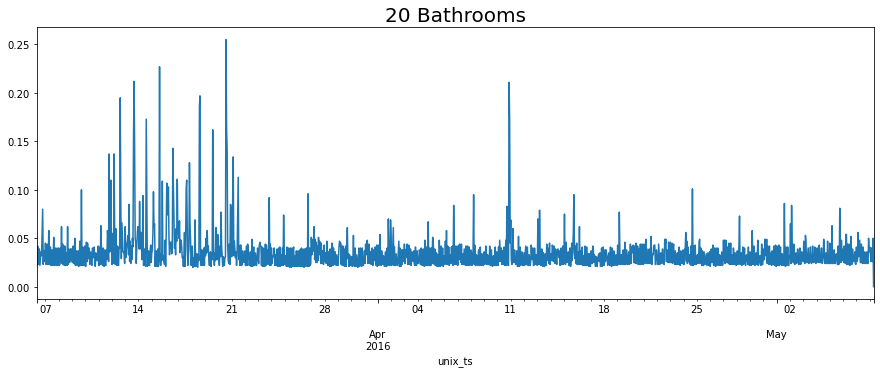

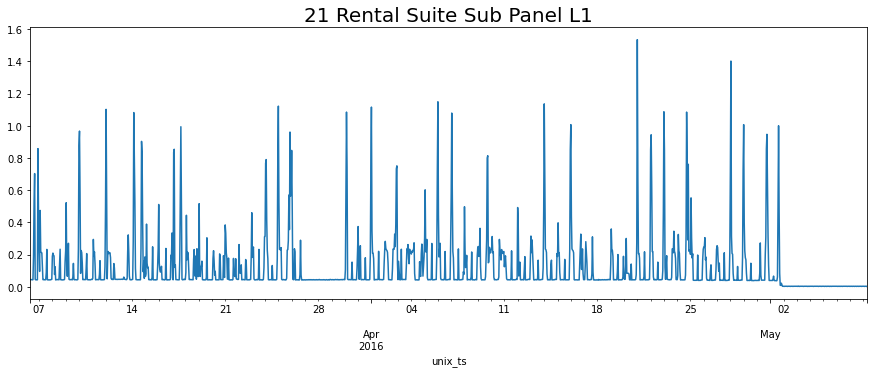

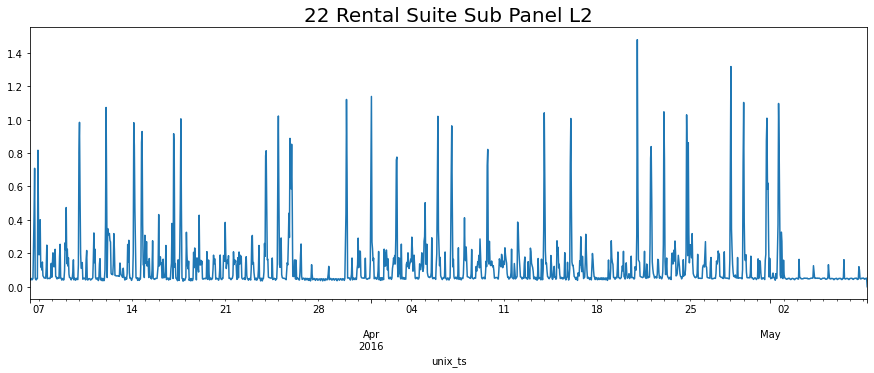

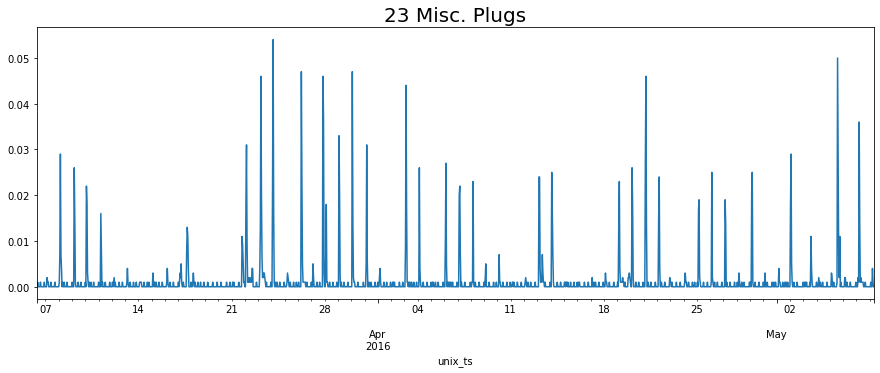

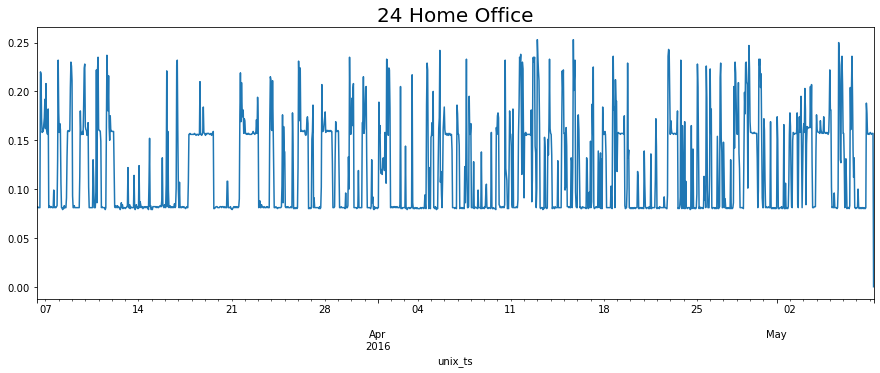

In [4]:
df = h1eb2.iloc[:,3:].copy()

for i in range(df.shape[1]):
    fig = df[df.columns[i]].plot(figsize=(15,5), title=df.columns[i])
    fig.axes.title.set_size(20)
    plt.show()

## Représentations graphiques PART_II

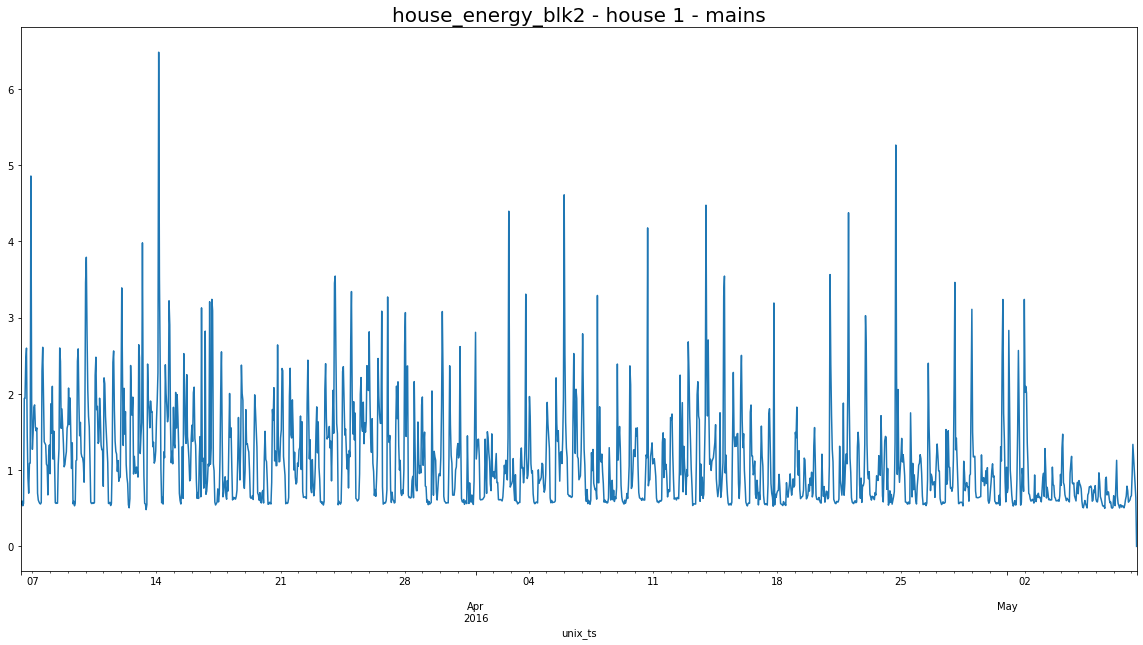

In [5]:
df1 = h1eb2.iloc[:,2].copy()
fig = df1.plot(figsize=(20,10), title='house_energy_blk2 - house 1 - mains')
fig.axes.title.set_size(20)

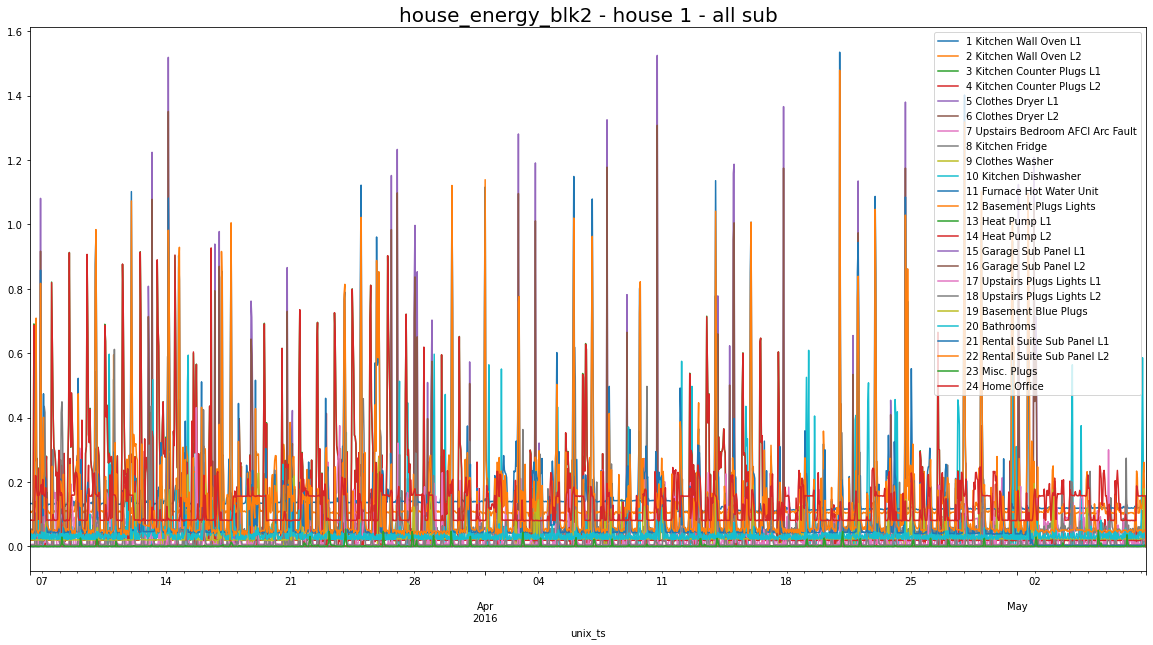

In [6]:
df2 = h1eb2.iloc[:,3:].copy()
fig = df2.plot(figsize=(20,10), title='house_energy_blk2 - house 1 - all sub')
fig.axes.title.set_size(20)

# ---------------------------------------------------------------

# ---------------------------------------------------------------

# ---------------------------------------------------------------

## house_power_blk2 - house 1 - 2016-03-06 to 2016-05-07, 63 days

In [7]:
h1pb2 = pd.read_csv('house1_power_blk2.csv')

# Nous renommons les colonnes de notre dataframe

l = h1_labels.iloc[:,0].tolist()

for i in range(len(l)):
    n = i + 1
    s = 'sub'+str(n)
    d = {s:l[i]}
    h1pb2.rename(columns=d, inplace=True)
    
# Convertissons la colonne unix_ts en datetime et passons cette colonne en index

h1pb2['unix_ts'] = pd.to_datetime(h1pb2['unix_ts'], unit='s')
h1pb2 = h1pb2.set_index('unix_ts', drop=False)

h1pb2.head(3)

,unix_ts,ihd,mains,1 Kitchen Wall Oven L1,2 Kitchen Wall Oven L2,3 Kitchen Counter Plugs L1,4 Kitchen Counter Plugs L2,5 Clothes Dryer L1,6 Clothes Dryer L2,7 Upstairs Bedroom AFCI Arc Fault,...,15 Garage Sub Panel L1,16 Garage Sub Panel L2,17 Upstairs Plugs Lights L1,18 Upstairs Plugs Lights L2,19 Basement Blue Plugs,20 Bathrooms,21 Rental Suite Sub Panel L1,22 Rental Suite Sub Panel L2,23 Misc. Plugs,24 Home Office
unix_ts,,,,,,,,,,,,,,,,,,,,,
2016-03-06 08:00:00,2016-03-06 08:00:00,NaN,473.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,...,0.0,0.0,5.0,4.0,20.0,3.0,43.0,3.0,0.0,78.0
2016-03-06 08:00:01,2016-03-06 08:00:01,NaN,474.0,0.0,1.0,0.0,2.0,0.0,0.0,6.0,...,0.0,0.0,5.0,4.0,20.0,2.0,43.0,3.0,0.0,78.0
2016-03-06 08:00:02,2016-03-06 08:00:02,NaN,476.0,0.0,1.0,0.0,2.0,0.0,0.0,5.0,...,0.0,0.0,5.0,4.0,20.0,2.0,44.0,3.0,0.0,78.0


## Représentations graphiques PART_I

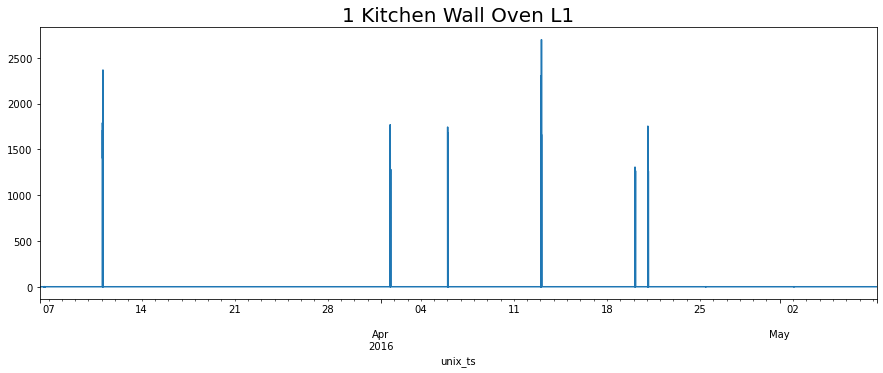

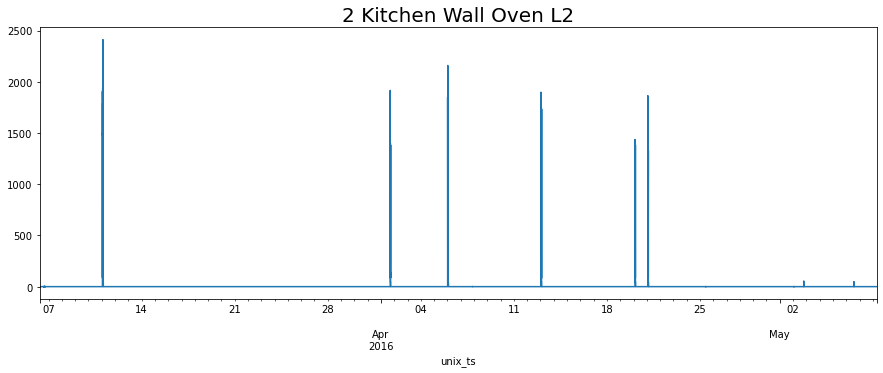

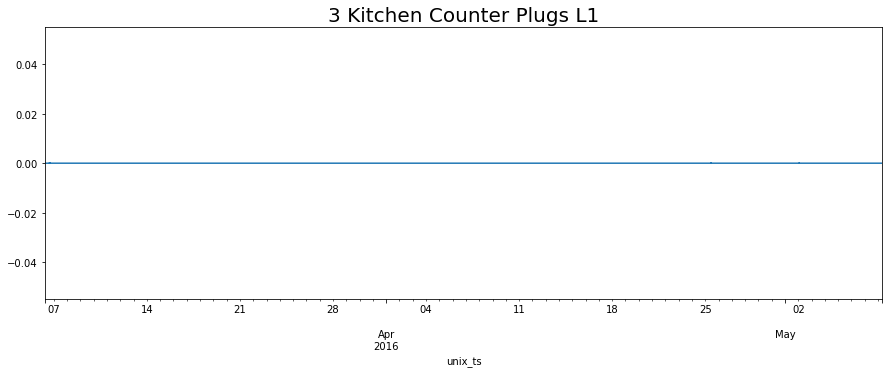

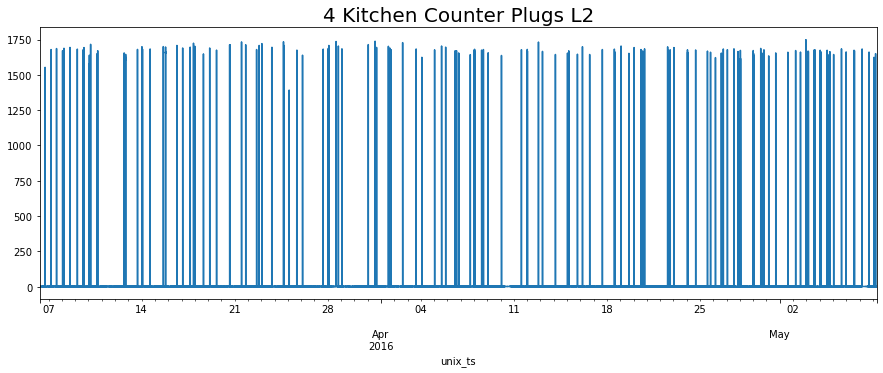

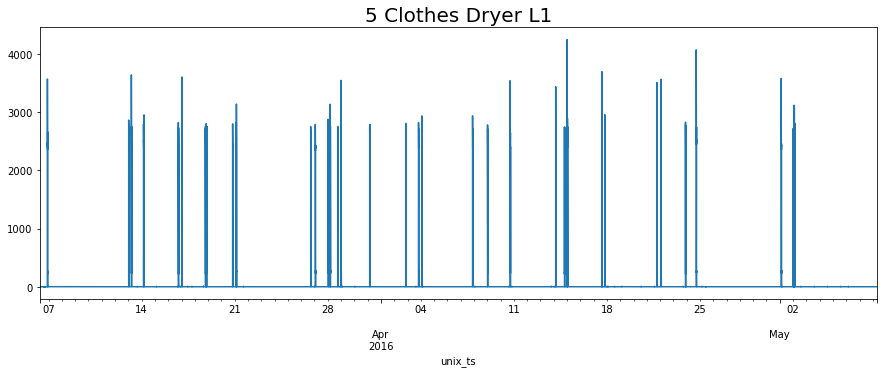

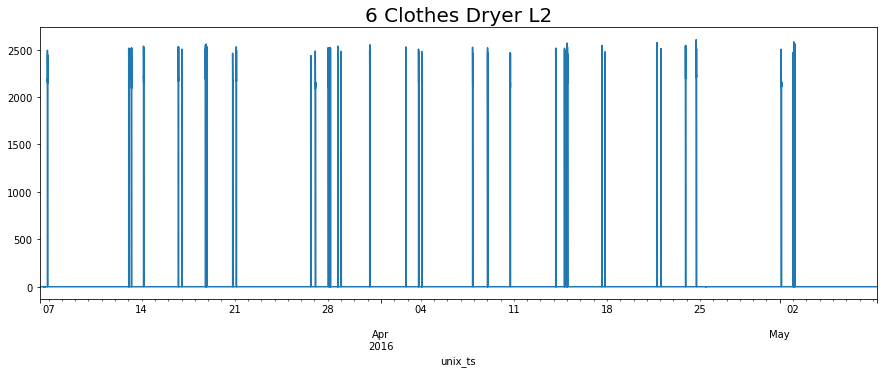

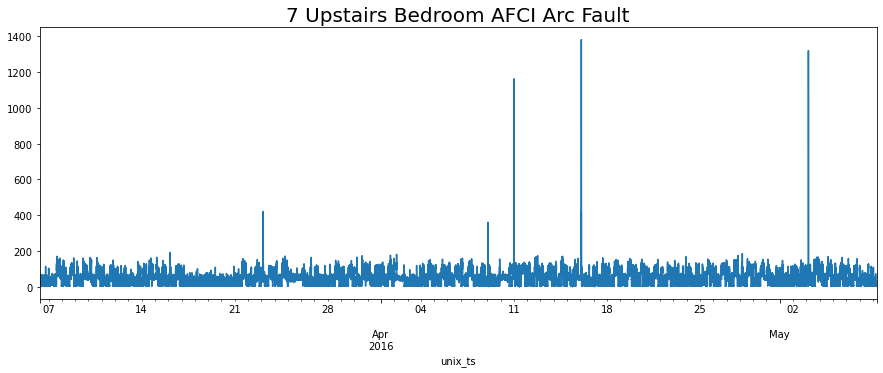

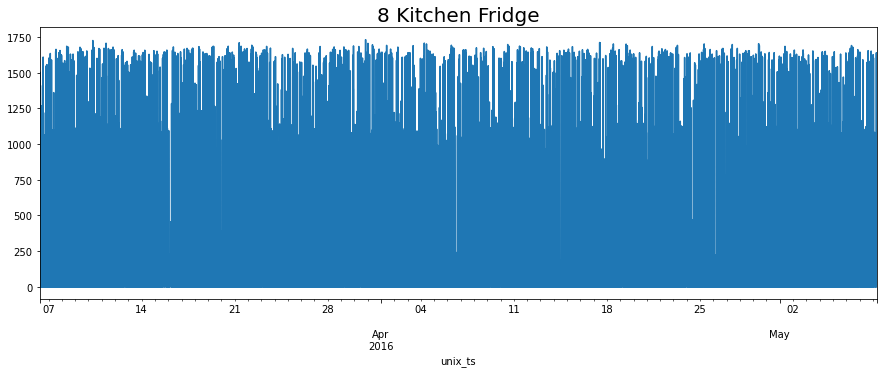

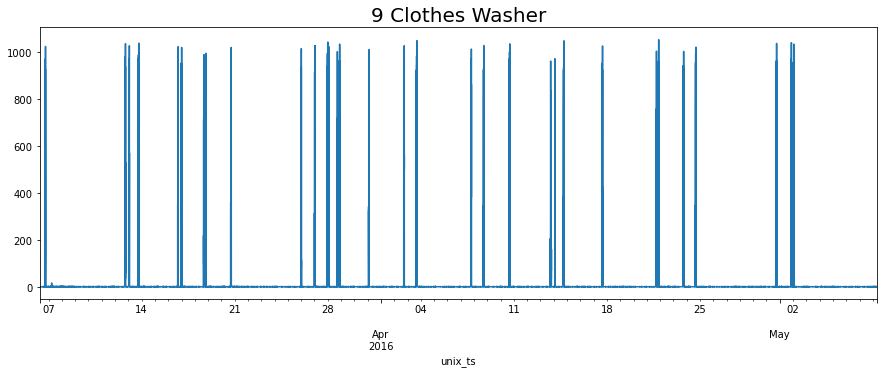

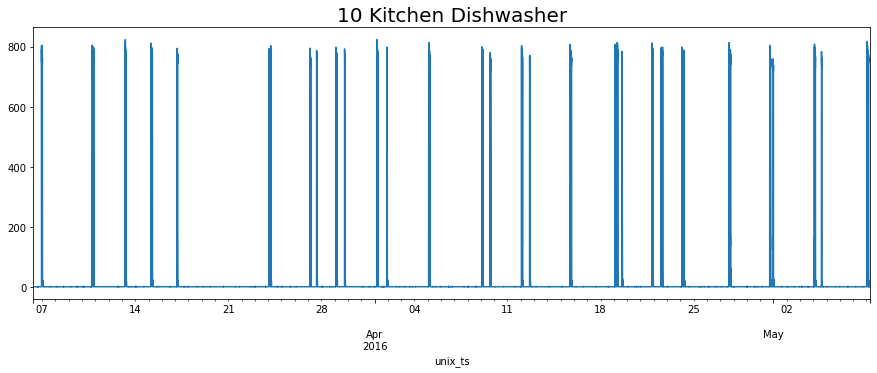

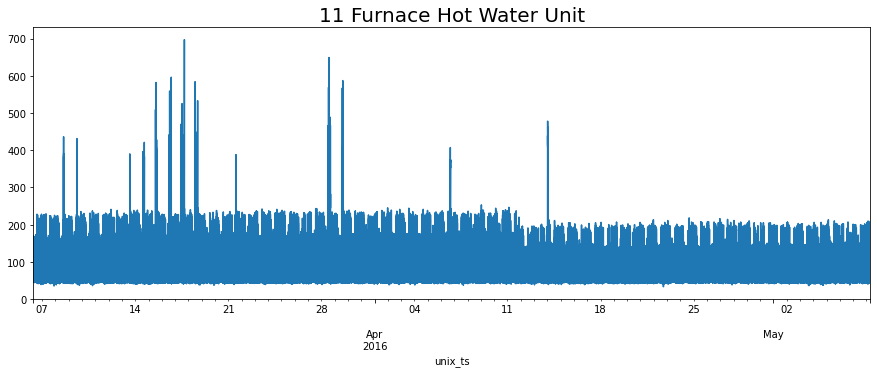

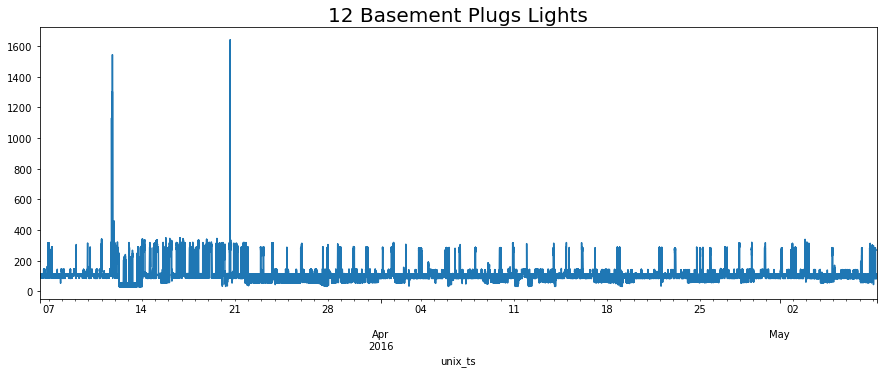

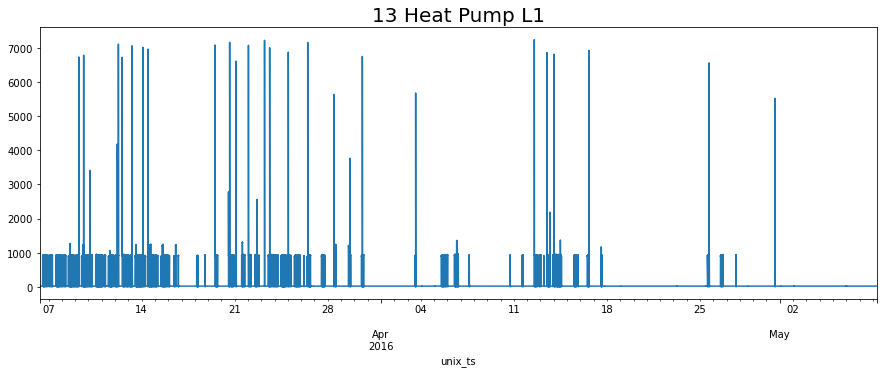

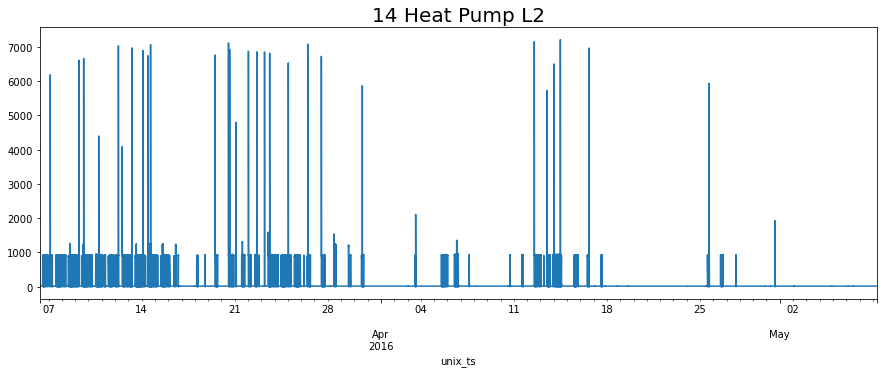

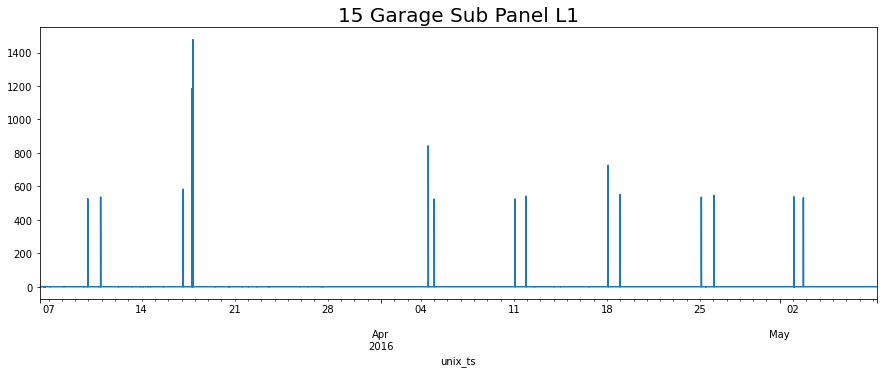

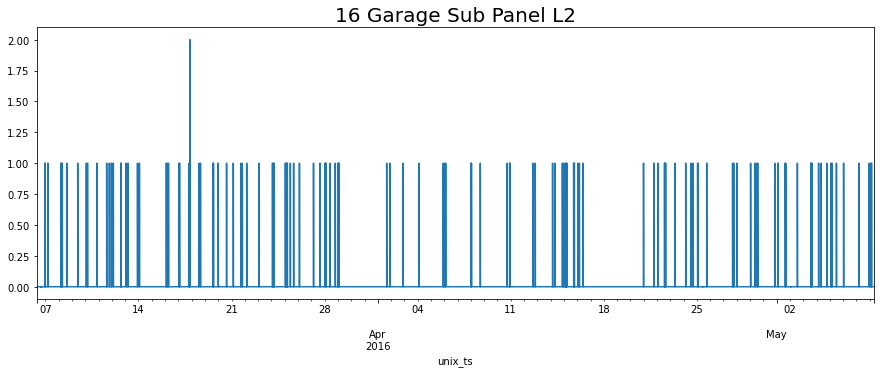

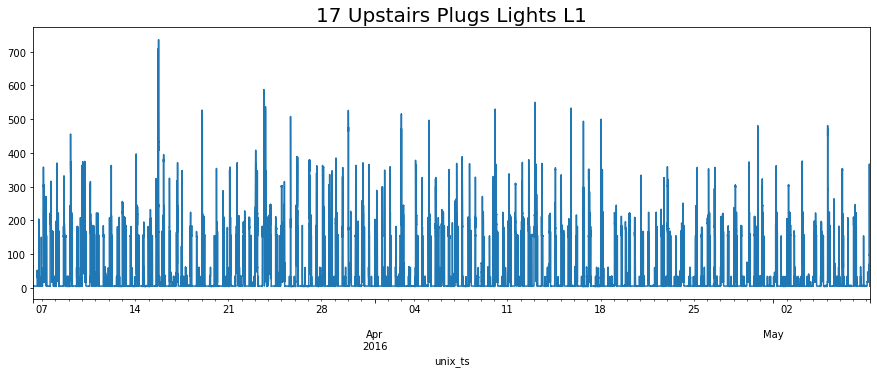

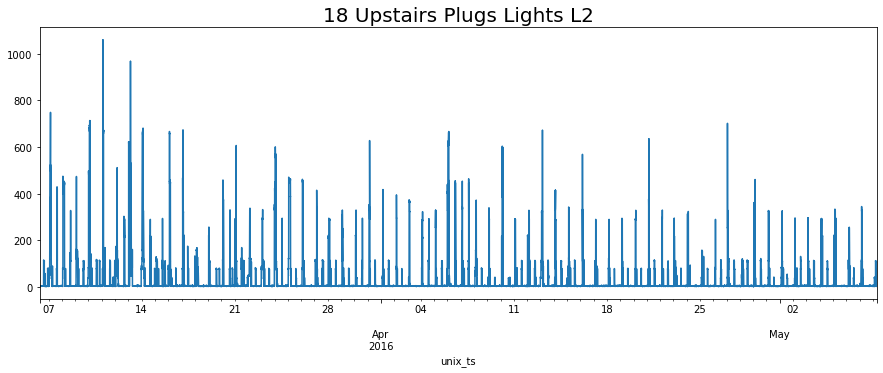

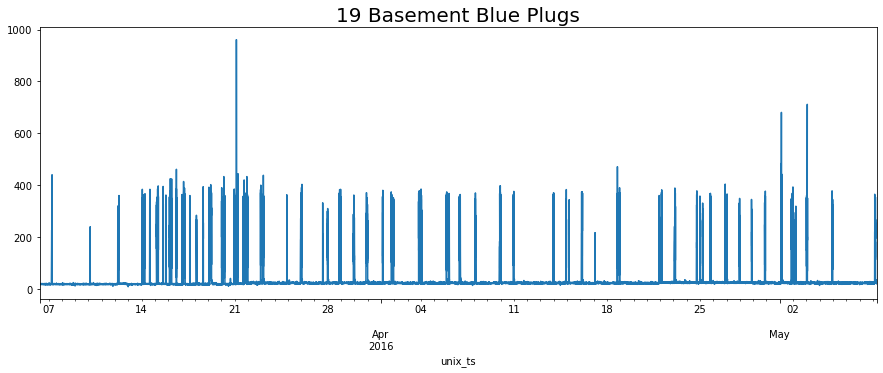

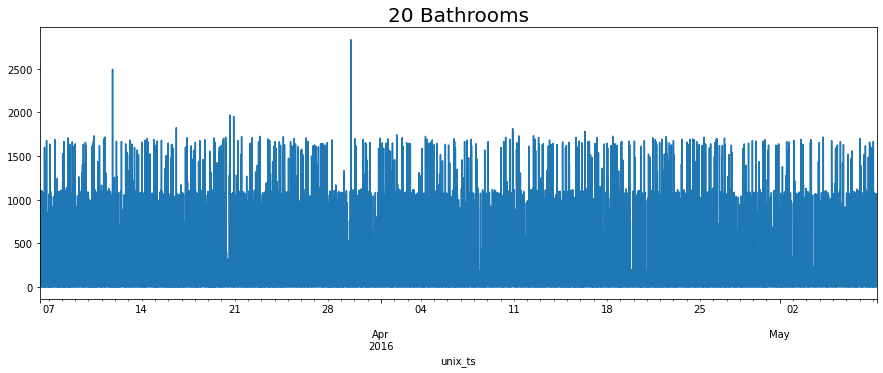

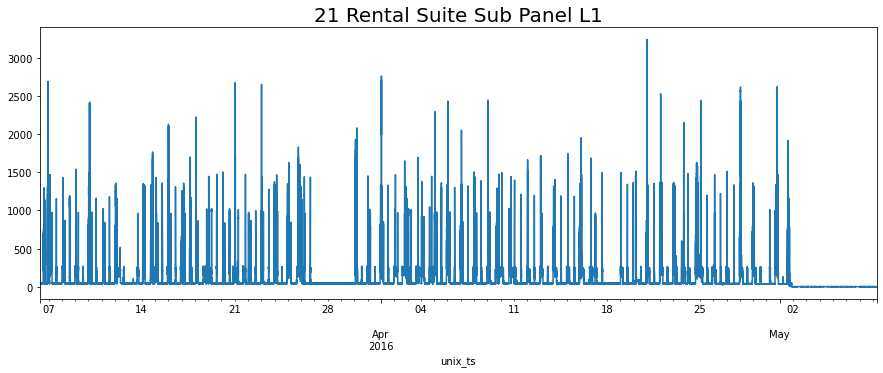

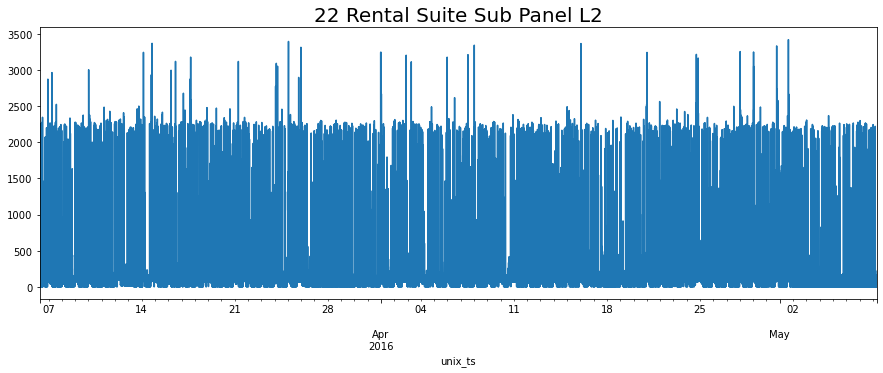

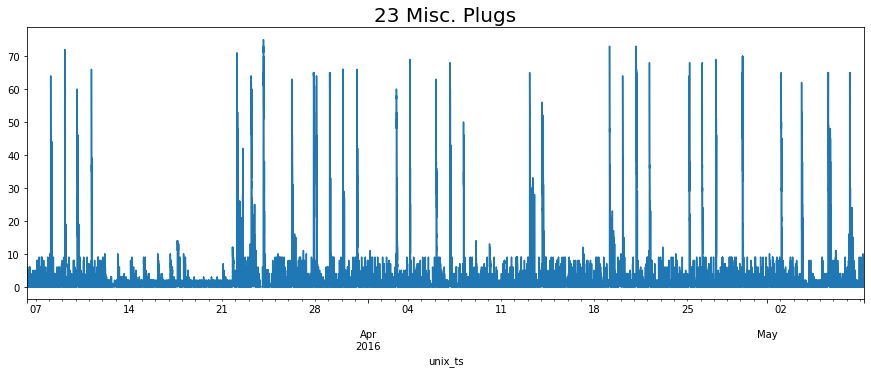

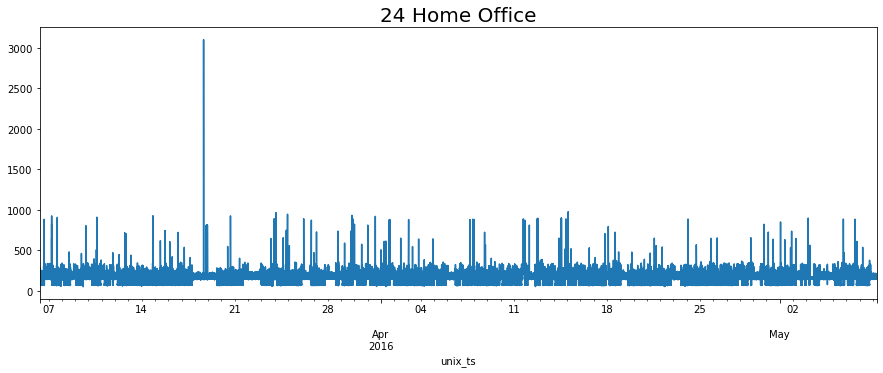

In [8]:
df = h1pb2.iloc[:,3:].copy()

for i in range(df.shape[1]):
    fig = df[df.columns[i]].plot(figsize=(15,5), title=df.columns[i])
    fig.axes.title.set_size(20)
    plt.show()

## Représentations graphiques PART_II

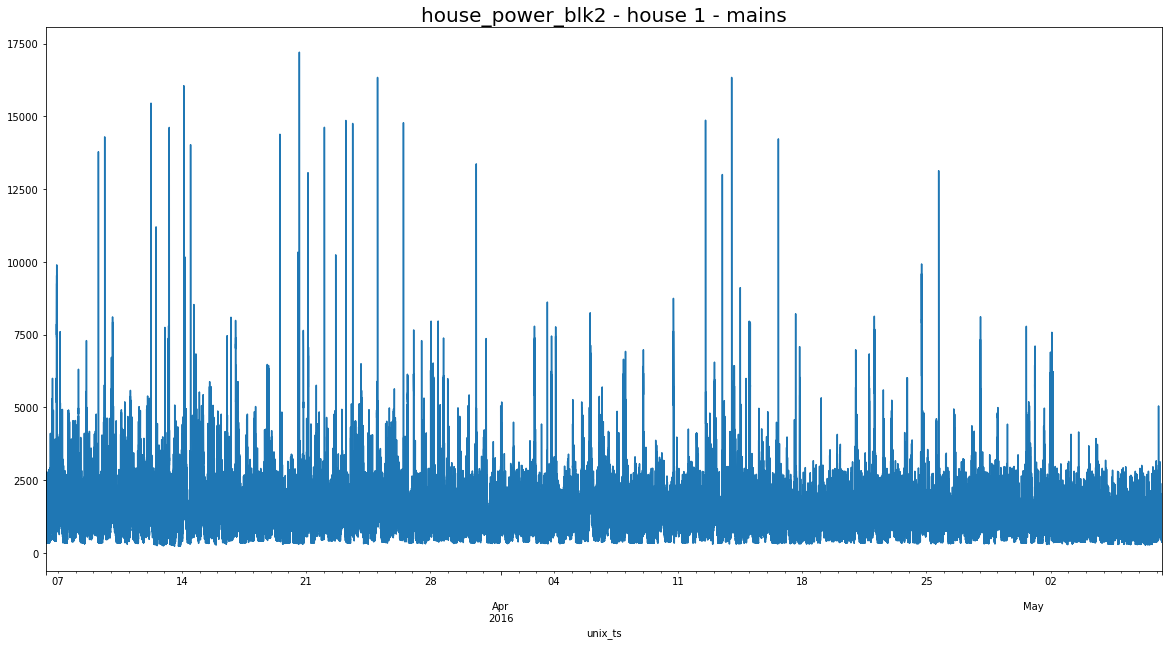

In [9]:
df1 = h1pb2.iloc[:,2].copy()
fig = df1.plot(figsize=(20,10), title='house_power_blk2 - house 1 - mains')
fig.axes.title.set_size(20)

### Manifestement mon ordi n'arrive pas à encaisser le dernier calculs ci-dessous ... :'( ...

In [11]:
df2 = h1pb2.iloc[:,3:].copy()
fig = df2.plot(figsize=(20,10), title='house_power_blk2 - house 1 - all sub')
fig.axes.title.set_size(20)

MemoryError: Unable to allocate 996. MiB for an array with shape (24, 5439600) and data type float64